In [43]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import interpolate


In [18]:
time_table = pd.read_csv(Path('..')/'data'/'time.csv')
time_table.columns = ['t', 'V'] 
time_table = time_table.sort_values(by='t').reset_index(drop=True)
time_table.head()

,t,V
0,0.010601,0.021583
1,0.187279,0.143885
2,0.441696,0.280576
3,0.618375,0.374101
4,0.865724,0.517986


<Axes: xlabel='t'>

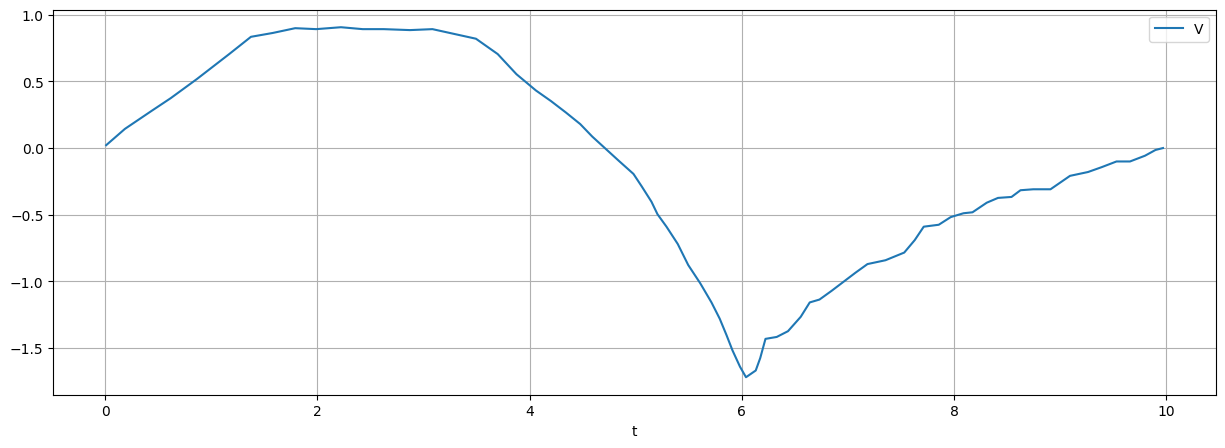

In [23]:
time_table.plot(x='t', y='V', figsize = (15,5), grid = True)

In [27]:
    data_path = Path('..') / 'data' 
    df1 = pd.read_csv(data_path/"Dataset (1).csv", header = None, sep = ';')
    df1.columns = ['x', 'y']
    df2 = pd.read_csv(data_path/"Dataset (2).csv", header = None, sep = ';')
    df2.columns = ['x', 'y']
    # interpolation and extrapolation
    I = interpolate.interp1d(df1['x'], df1['y'], fill_value='extrapolate')
    y2 = I(df2['x'])
    df2['y2'] = y2
    # # min-max normalization
    # glob_min = min(min(df2['y']), min(df2['y2']))
    # glob_max = max(max(df2['y']), max(df2['y2']))
    # df2['y'] = (df2['y'] - glob_min)/(glob_max - glob_min)
    # df2['y2'] = (df2['y2'] - glob_min)/(glob_max - glob_min) 

In [35]:
    I_1 = interpolate.interp1d(df1['x'], df1['y'], fill_value='extrapolate')
    I_2 = interpolate.interp1d(df2['x'], df2['y'], fill_value='extrapolate')


In [40]:
V_from_t = interpolate.interp1d(time_table.t, time_table.V, fill_value='extrapolate') 

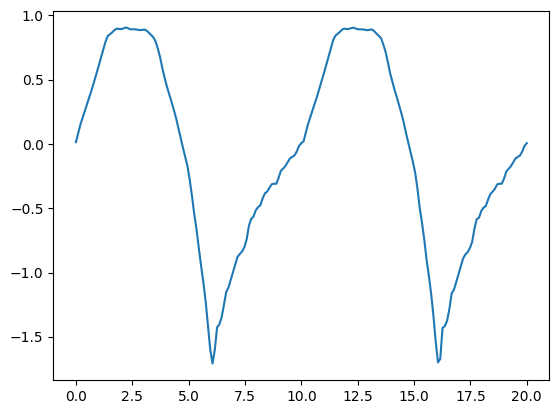

In [57]:
new_t = np.linspace(0, 20, 199)
new_V = np.concatenate((V_from_t(np.linspace(0, 10, 100)), V_from_t(np.linspace(0.01, 10, 99))))
plt.plot(new_t, new_V)

In [52]:
np.concatenate

<function numpy.concatenate>

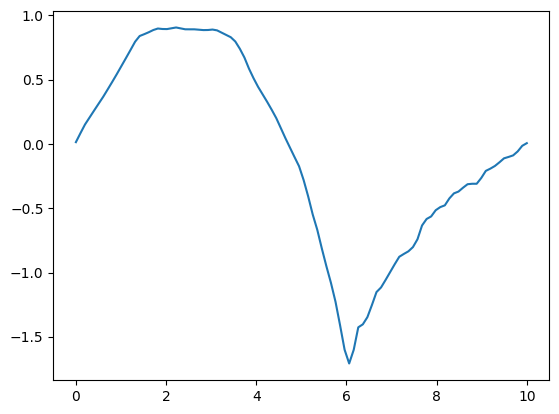

In [49]:
plt.plot(np.linspace(0, 10, 100), V_from_t(np.linspace(0, 10, 100)))

In [28]:
df2

,x,y,y2
0,-1.708580,-0.000042,-0.000042
1,-1.696150,-0.000039,-0.000045
2,-1.683720,-0.000039,-0.000046
3,-1.670470,-0.000038,-0.000047
4,-1.658870,-0.000037,-0.000047
...,...,...,...
264,0.847222,0.000162,0.000172
265,0.847222,0.000168,0.000172
266,0.848258,0.000165,0.000172
267,0.849293,0.000170,0.000172


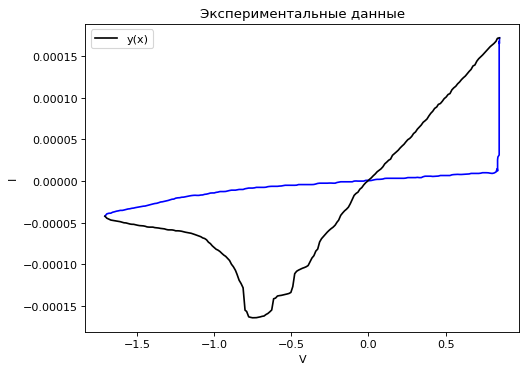

In [29]:
    plt.figure(figsize = (7, 5), dpi = 80)
    plt.plot(df2['x'], df2['y'], color = 'blue')
    plt.plot(df2['x'], df2['y2'], color = 'black', label = 'y(x)')
    plt.legend()
    plt.xlabel('V')
    plt.ylabel('I')
    plt.title('Экспериментальные данные')
    plt.show()

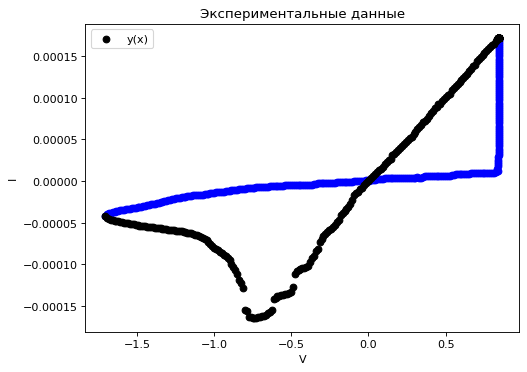

In [38]:
    plt.figure(figsize = (7, 5), dpi = 80)
    plt.scatter(df2['x'], df2['y'], color = 'blue')
    plt.scatter(df2['x'], df2['y2'], color = 'black', label = 'y(x)')
    plt.legend()
    plt.xlabel('V')
    plt.ylabel('I')
    plt.title('Экспериментальные данные')
    plt.show()

c:\Users\Peter Chizhov\.virtualenvs\neuralODE-ds-KE61R\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


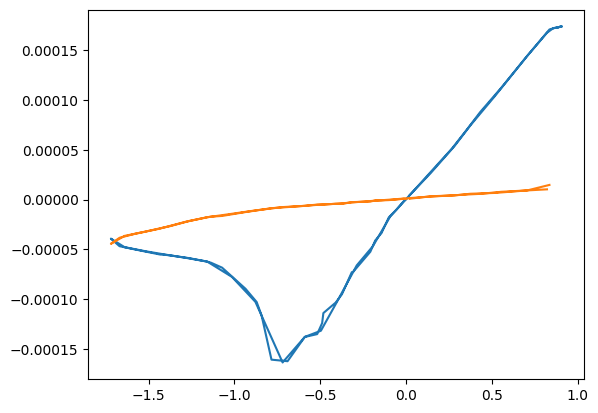

In [39]:
plt.plot(time_table.V, I_1(time_table.V))
plt.plot(time_table.V, I_2(time_table.V))

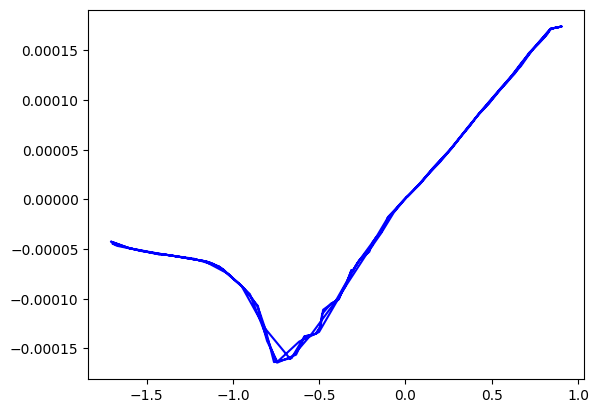

In [59]:
plt.plot(new_V, I_1(new_V), color = 'blue')
# plt.plot(time_table.V, I_2(time_table.V), color = 'black')

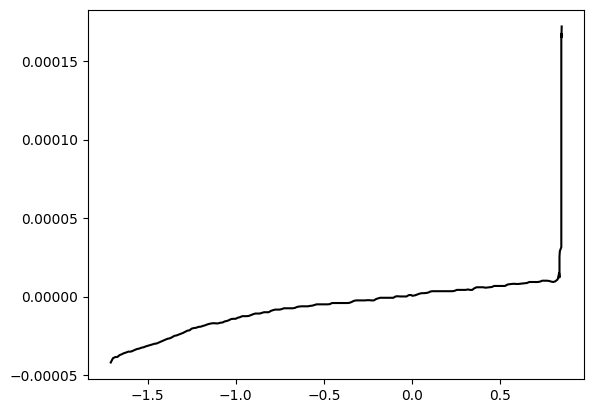

In [62]:
    plt.plot(df2['x'], df2['y'], color = 'black', label = 'y(x)')


In [78]:
I1_from_V = interpolate.interp1d(df2.x, df2.y, fill_value='extrapolate') 
I2_from_V = interpolate.interp1d(df2.x, df2.y2, fill_value='extrapolate') 

-1.70858 0.849293


In [107]:
print(min(time_table.V), max(time_table.V))

-1.7194244604316549 0.9064748201438848


In [108]:
print(min(v_another_period), max(v_another_period))

-1.7075095168620351 0.9043659597304563


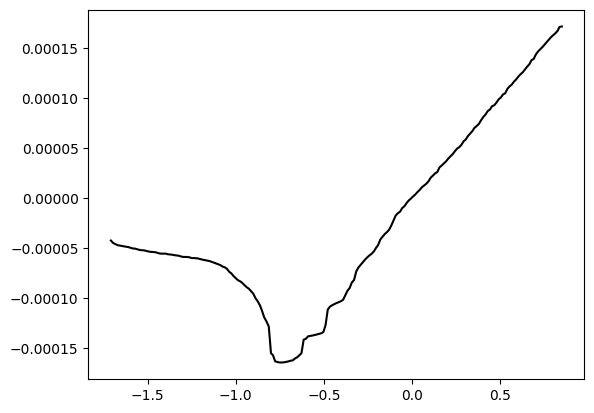

In [60]:
    plt.plot(df2['x'], df2['y2'], color = 'black', label = 'y(x)')


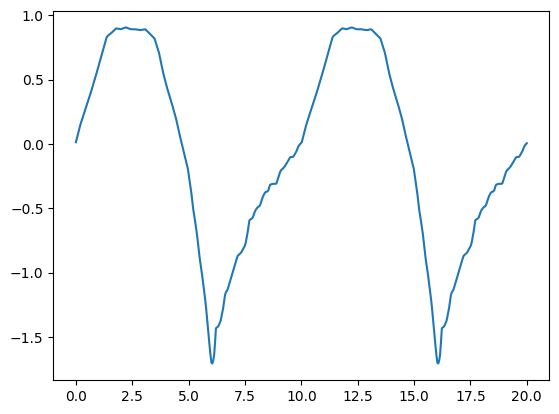

In [225]:
# period = 100 ts, 10sec
new_t = np.linspace(0, 20, 500)
new_V = np.concatenate((V_from_t(np.linspace(0, 10, 250)), V_from_t(np.linspace(0, 10, 250))))
plt.plot(new_t, new_V)

In [226]:
print(min(df2.x), max(df2.x))
print(min(new_V), max(new_V))

-1.70858 0.849293
-1.7055082532676364 0.9056246787892795


-1.70858 0.8492929999999999


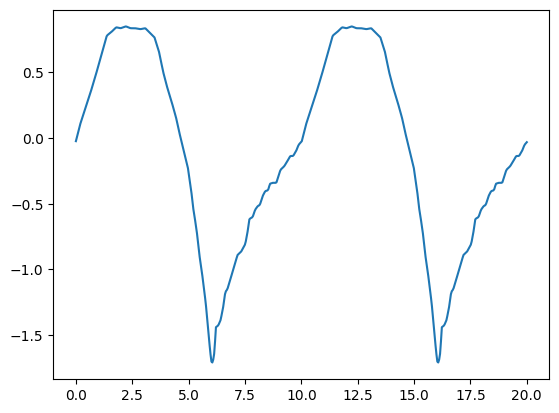

In [228]:
new_V_scaled = min(df2.x) + (new_V - min(new_V)) * (max(df2.x) - min(df2.x)) / (max(new_V) - min(new_V))
print(min(new_V_scaled), max(new_V_scaled))
new_t = np.linspace(0, 20, 500)
# new_V = np.concatenate((V_from_t(np.linspace(0, 10, 100)), V_from_t(np.linspace(0, 10, 100))))
plt.plot(new_t, new_V_scaled)

In [116]:
newV_from_t = interpolate.interp1d(new_t, new_V_scaled, fill_value='extrapolate')

In [229]:
newV_from_t2 = interpolate.interp1d(new_t, new_V_scaled, fill_value='extrapolate')

In [117]:
I1_from_V = interpolate.interp1d(df2.x, df2.y, fill_value='extrapolate') 
I2_from_V = interpolate.interp1d(df2.x, df2.y2, fill_value='extrapolate') 

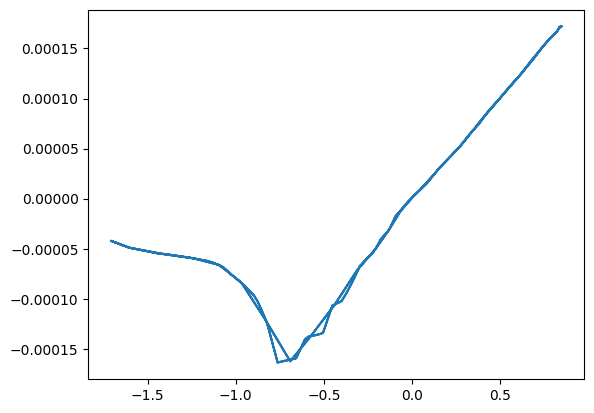

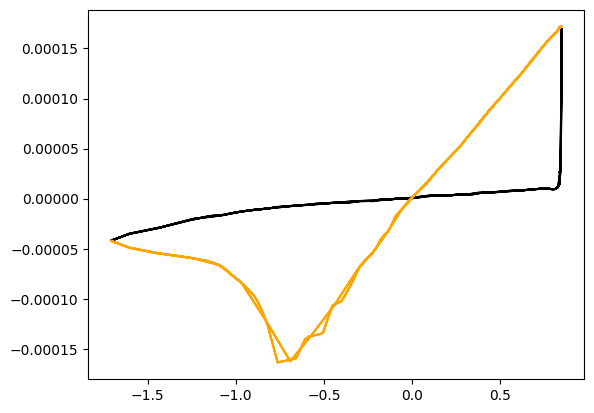

In [129]:
plt.plot(newV_from_t(new_t), I1_from_V(newV_from_t(new_t)), color = 'black')
plt.plot(newV_from_t(new_t), I2_from_V(newV_from_t(new_t)), color = 'orange')

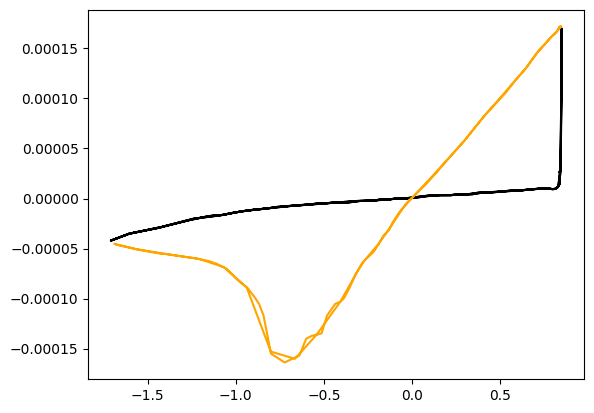

In [130]:
plt.plot(newV_from_t(t_another_period), I2_from_V(newV_from_t(t_another_period)), color = 'orange')

In [144]:
t_another_period = new_t[np.logical_and(new_t >= 6, new_t < 16)]
# finding threshold 
pred_V = newV_from_t(t_another_period[0])
ind = 1
t = t_another_period[ind]
while (newV_from_t(t) >= pred_V):
    pred_V = newV_from_t(t)
    ind += 1
    t = t_another_period[ind]



In [209]:
len(df2)

269

In [145]:
print(ind)
print(t)
print(pred_V)

59
11.959798994974875
0.8413282686884118


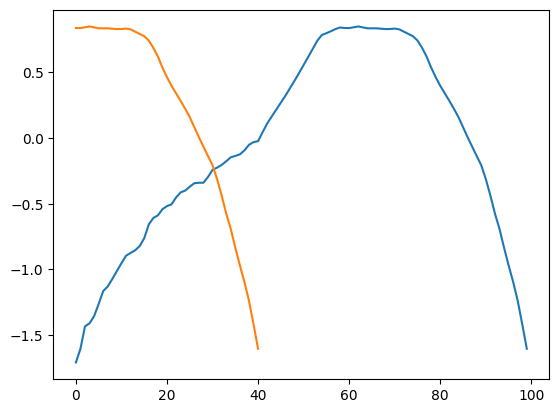

In [146]:
plt.plot(newV_from_t(t_another_period))
plt.plot(newV_from_t(t_another_period[59:]))

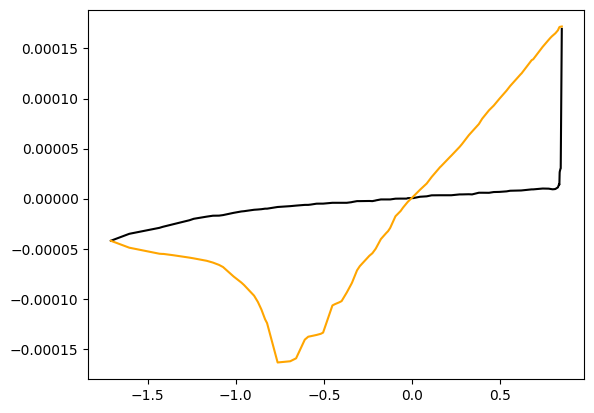

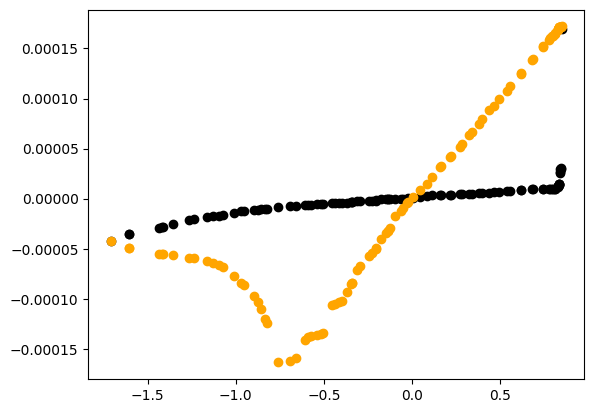

In [189]:
plt.plot(sorted(newV_from_t(t_another_period)), I1_from_V(sorted(newV_from_t(t_another_period))), color = 'black')
plt.plot(sorted(newV_from_t(t_another_period)), I2_from_V(sorted(newV_from_t(t_another_period))), color = 'orange')
plt.show()
plt.scatter(sorted(newV_from_t(t_another_period)), I1_from_V(sorted(newV_from_t(t_another_period))), color = 'black')
plt.scatter(sorted(newV_from_t(t_another_period)), I2_from_V(sorted(newV_from_t(t_another_period))), color = 'orange')

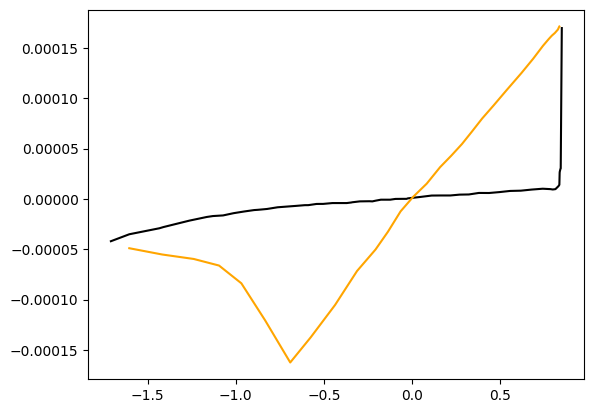

In [160]:
threshold = 65
plt.plot(sorted(newV_from_t(t_another_period[:threshold])), I1_from_V(sorted(newV_from_t(t_another_period[:threshold]))), color = 'black')
plt.plot(sorted(newV_from_t(t_another_period[threshold:])), I2_from_V(sorted(newV_from_t(t_another_period[threshold:]))), color = 'orange')

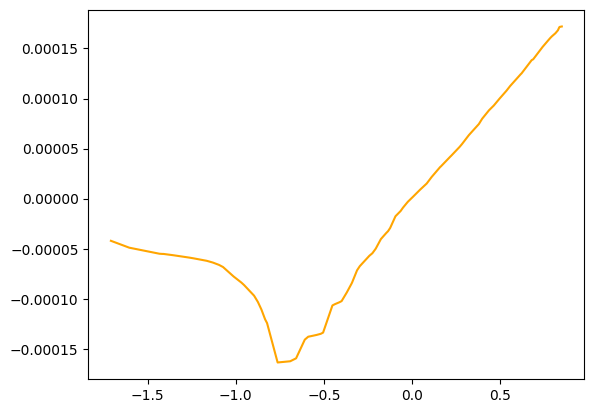

In [169]:
threshold = 0
plt.plot(sorted(newV_from_t(t_another_period[:threshold])), I1_from_V(sorted(newV_from_t(t_another_period[:threshold]))), color = 'black')
plt.plot(sorted(newV_from_t(t_another_period[threshold:])), I2_from_V(sorted(newV_from_t(t_another_period[threshold:]))), color = 'orange')

176
11.899999999999999
0.8410647388103974


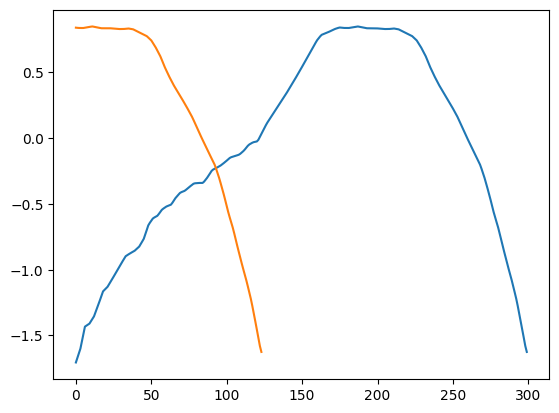

In [173]:
t_hype_period = np.linspace(6 + (16 - 6)/300, 16, 300)
# finding threshold 
pred_V = newV_from_t(t_hype_period[0])
ind = 1
t = t_hype_period[ind]
while (newV_from_t(t) >= pred_V):
    pred_V = newV_from_t(t)
    ind += 1
    t = t_hype_period[ind]
print(ind)
print(t)
print(pred_V)
plt.plot(newV_from_t(t_hype_period))
plt.plot(newV_from_t(t_hype_period[ind:]))

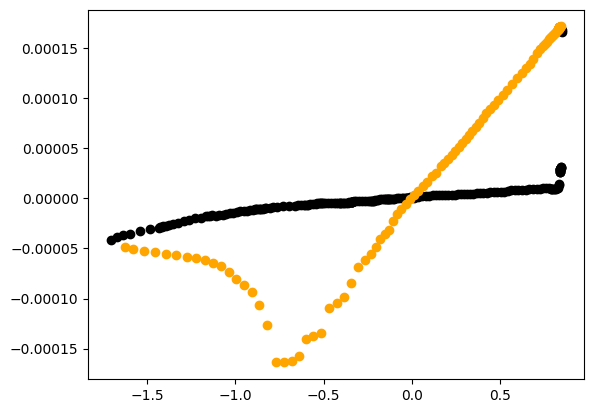

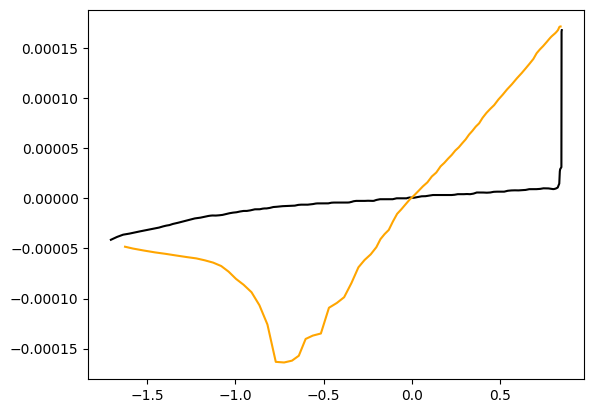

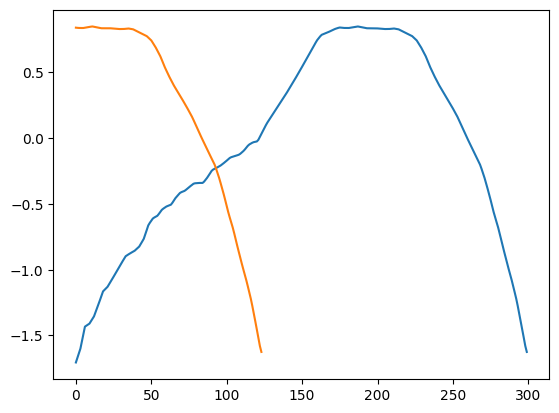

In [208]:
threshold = 190
plt.scatter(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.scatter(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')
plt.show()
plt.plot(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.plot(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')
plt.show()

plt.plot(newV_from_t(t_hype_period))
plt.plot(newV_from_t(t_hype_period[ind:]))

In [210]:
len(df2)

269

379
13.600009638515507
0.7357722771896265


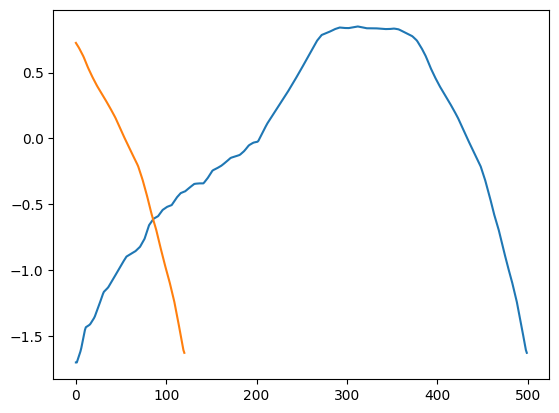

In [215]:
t_hype_period = np.linspace(6 + (16 - 6)/499, 16, 500)
# finding threshold 
pred_V = newV_from_t(t_hype_period[0])
ind = 1
t = t_hype_period[ind]
while (newV_from_t(t) + 1/100 >= pred_V):
    pred_V = newV_from_t(t)
    ind += 1
    t = t_hype_period[ind]
print(ind)
print(t)
print(pred_V)
plt.plot(newV_from_t(t_hype_period))
plt.plot(newV_from_t(t_hype_period[ind:]))

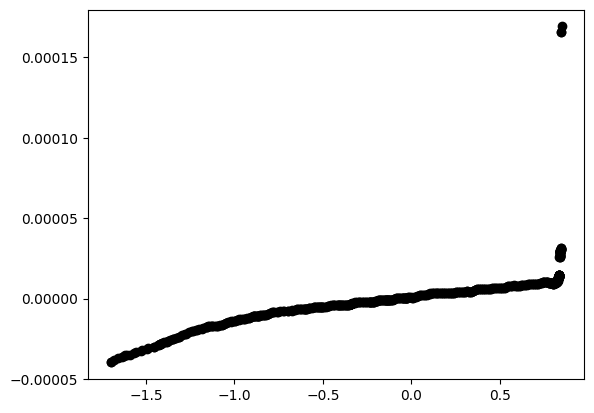

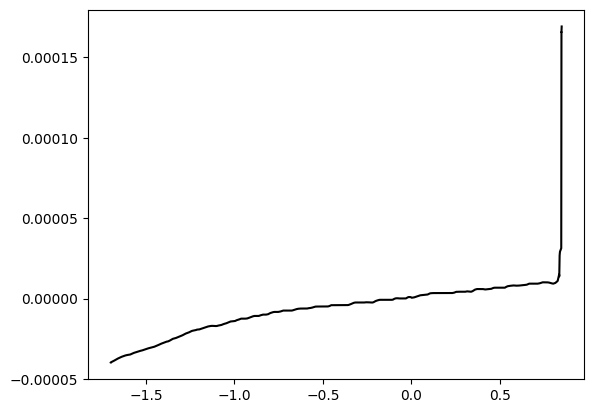

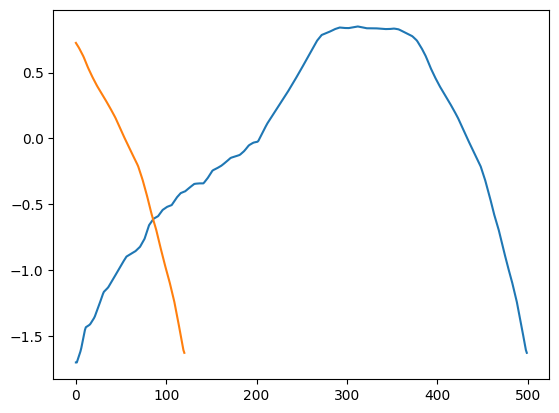

In [222]:
threshold = 500
plt.scatter(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.scatter(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')
plt.show()
plt.plot(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.plot(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')
plt.show()

plt.plot(newV_from_t(t_hype_period))
plt.plot(newV_from_t(t_hype_period[ind:]))

460
13.684116145479607
0.6874699050813782


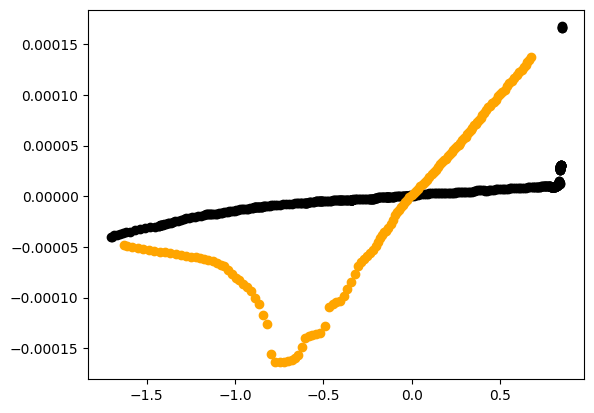

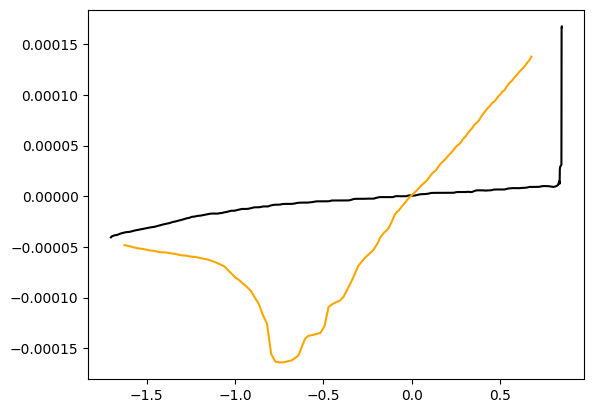

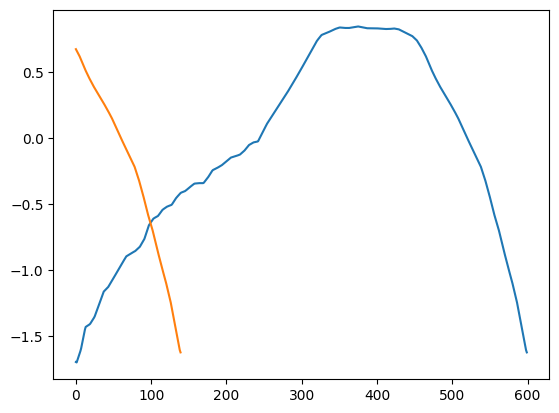

In [224]:
t_hype_period = np.linspace(6 + (16 - 6)/499, 16, 600)
# finding threshold 
pred_V = newV_from_t(t_hype_period[0])
ind = 1
t = t_hype_period[ind]
while (newV_from_t(t) + 1/100 >= pred_V):
    pred_V = newV_from_t(t)
    ind += 1
    t = t_hype_period[ind]
print(ind)
print(t)
print(pred_V)
threshold = 460

plt.scatter(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.scatter(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')
plt.show()
plt.plot(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.plot(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')
plt.show()

plt.plot(newV_from_t(t_hype_period))
plt.plot(newV_from_t(t_hype_period[ind:]))

In [ ]:
threshold = 220
plt.scatter(sorted(newV_from_t(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t(t_hype_period[:threshold]))), color = 'black')
plt.scatter(sorted(newV_from_t(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t(t_hype_period[threshold:]))), color = 'orange')

450
15.02
-0.24129589553459788


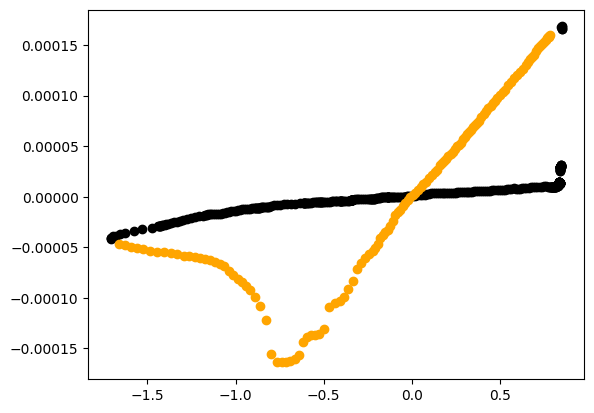

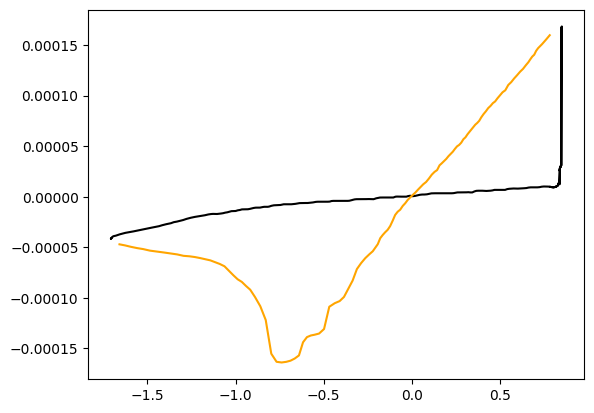

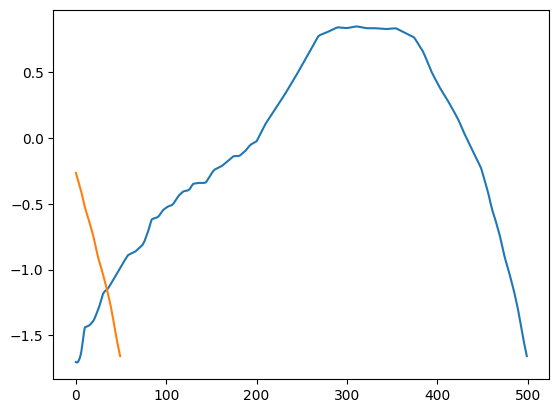

In [287]:
t_hype_period = np.linspace(6+10/500, 16, 500)
# finding threshold 
pred_V = newV_from_t2(t_hype_period[0])
ind = 1
t = t_hype_period[ind]
while (newV_from_t2(t) + 1/50 >= pred_V):
    pred_V = newV_from_t2(t)
    ind += 1
    t = t_hype_period[ind]
print(ind)
print(t)
print(pred_V)
threshold = 370

plt.scatter(newV_from_t2(t_hype_period[:threshold]), I1_from_V(newV_from_t2(t_hype_period[:threshold])), color = 'black')
plt.scatter(newV_from_t2(t_hype_period[threshold:]), I2_from_V(newV_from_t2(t_hype_period[threshold:])), color = 'orange')
plt.show()
plt.plot(newV_from_t2(t_hype_period[:threshold]), I1_from_V(newV_from_t2(t_hype_period[:threshold])), color = 'black')
plt.plot(newV_from_t2(t_hype_period[threshold:]), I2_from_V(newV_from_t2(t_hype_period[threshold:])), color = 'orange')
plt.show()

plt.plot(newV_from_t2(t_hype_period))
plt.plot(newV_from_t2(t_hype_period[ind:]))

# Сохраняем финальные данные в формате датафрейма t V I

In [250]:
threshold

350

In [137]:
plt.scatter(sorted(newV_from_t2(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t2(t_hype_period[:threshold]))), color = 'black')
plt.scatter(sorted(newV_from_t2(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t2(t_hype_period[threshold:]))), color = 'orange')
plt.show()
plt.plot(sorted(newV_from_t2(t_hype_period[:threshold])), I1_from_V(sorted(newV_from_t2(t_hype_period[:threshold]))), color = 'black')
plt.plot(sorted(newV_from_t2(t_hype_period[threshold:])), I2_from_V(sorted(newV_from_t2(t_hype_period[threshold:]))), color = 'orange')

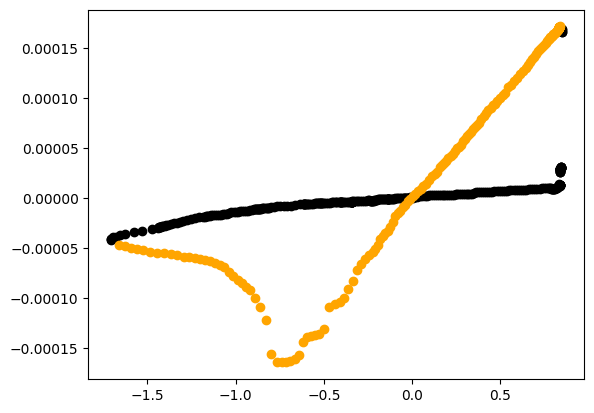

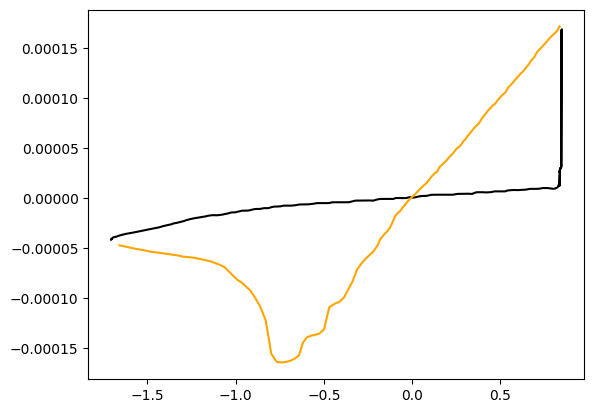

In [256]:
threshold =330
plt.scatter(newV_from_t2(t_hype_period[:threshold]), I1_from_V(newV_from_t2(t_hype_period[:threshold])), color = 'black')
plt.scatter(newV_from_t2(t_hype_period[threshold:]), I2_from_V(newV_from_t2(t_hype_period[threshold:])), color = 'orange')
plt.show()
plt.plot(newV_from_t2(t_hype_period[:threshold]), I1_from_V(newV_from_t2(t_hype_period[:threshold])), color = 'black')
plt.plot(newV_from_t2(t_hype_period[threshold:]), I2_from_V(newV_from_t2(t_hype_period[threshold:])), color = 'orange')

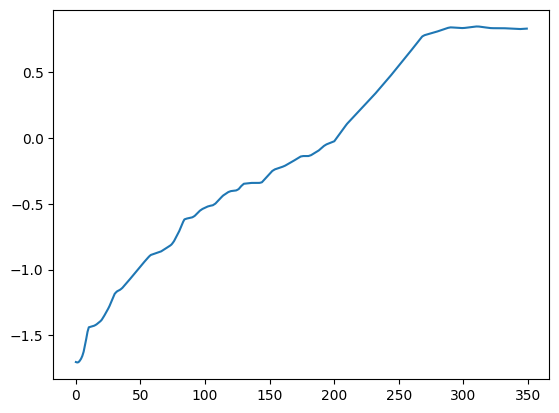

In [245]:
plt.plot(newV_from_t2(t_hype_period[:threshold]))

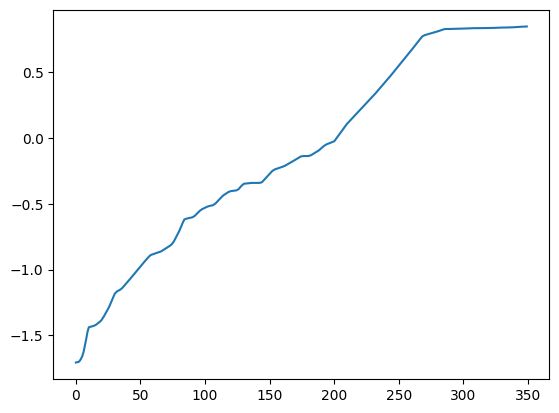

In [246]:
plt.plot(sorted(newV_from_t2(t_hype_period[:threshold])))

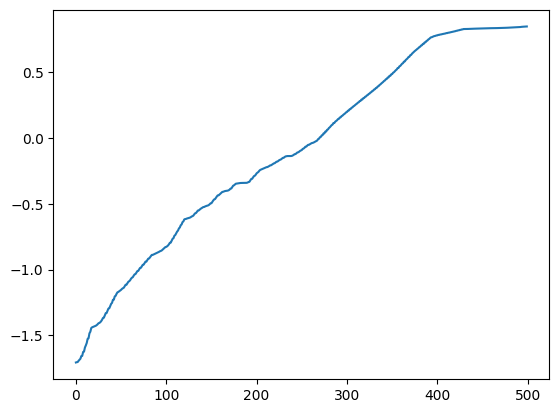

In [284]:
plt.plot(sorted(newV_from_t2(t_hype_period)))

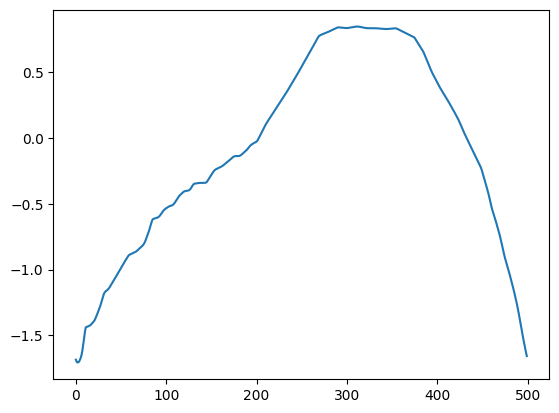

In [285]:
plt.plot(newV_from_t2(t_hype_period))

In [299]:
threshold

370

In [303]:
# threshold = 370
V_ascend = (newV_from_t2(t_hype_period[:threshold]))
V_descend = (newV_from_t2(t_hype_period[threshold:]))
I1 = I1_from_V(V_ascend)
I2 = I2_from_V(V_descend)
some_V = np.concatenate((V_ascend, V_descend))
some_I = np.concatenate((I1, I2))
I_V_timed = pd.DataFrame(t_hype_period.reshape(-1, 1), columns = ['time'])
I_V_timed['I'] = some_I
I_V_timed['V'] = some_V

In [315]:
V_ascend

array([-1.70327425, -1.70657958, -1.70433172, -1.69357085, -1.67842916,
       -1.65645792, -1.62469663, -1.57741331, -1.52755841, -1.47355667,
       -1.43899926, -1.43633466, -1.43367006, -1.43100547, -1.42751636,
       -1.42262781, -1.41660047, -1.40860668, -1.40061288, -1.39261909,
       -1.38193597, -1.36644511, -1.35019429, -1.33256093, -1.31492756,
       -1.2972942 , -1.27765815, -1.25424825, -1.23030009, -1.20531949,
       -1.1849923 , -1.17375164, -1.16472946, -1.16011765, -1.15465767,
       -1.14748075, -1.1389762 , -1.12773493, -1.11649367, -1.1052524 ,
       -1.09389743, -1.08229932, -1.070617  , -1.05875121, -1.04688543,
       -1.03501964, -1.02315386, -1.01128808, -0.99942229, -0.98755651,
       -0.97569072, -0.96382494, -0.95213214, -0.94085358, -0.92958585,
       -0.91834458, -0.90738608, -0.89713153, -0.8888334 , -0.88550266,
       -0.88217191, -0.87884116, -0.87551042, -0.87217967, -0.86884892,
       -0.86551818, -0.86145122, -0.85535828, -0.84918604, -0.84

In [316]:
V_descend

array([ 0.78067099,  0.77722539,  0.77377979,  0.77033419,  0.76688859,
        0.7586098 ,  0.74772049,  0.73674302,  0.7257171 ,  0.71469118,
        0.70366526,  0.69263935,  0.68161343,  0.67058751,  0.65956159,
        0.64534986,  0.62926114,  0.61273585,  0.59594889,  0.57916192,
        0.56237496,  0.545588  ,  0.52880104,  0.51310798,  0.49810486,
        0.4842814 ,  0.47121463,  0.45814785,  0.44508108,  0.43201431,
        0.41894753,  0.40588076,  0.39281398,  0.38086037,  0.36967017,
        0.35859707,  0.3476056 ,  0.33661414,  0.32562268,  0.31440775,
        0.30303178,  0.29130102,  0.27931034,  0.26731965,  0.25532896,
        0.24333827,  0.23134759,  0.21904827,  0.20651145,  0.19392696,
        0.18130519,  0.16868341,  0.15606164,  0.14239614,  0.12788734,
        0.11242938,  0.09619199,  0.0799546 ,  0.06371721,  0.04822999,
        0.03337902,  0.01883758,  0.00456296, -0.00971167, -0.0239863 ,
       -0.03826093, -0.05253555, -0.06681018, -0.08108481, -0.09

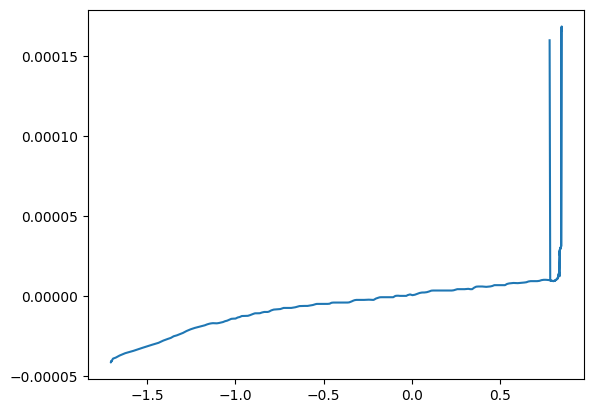

In [314]:
plt.plot(np.append(V_ascend, V_descend[0]), np.append(I1, I2[0]))

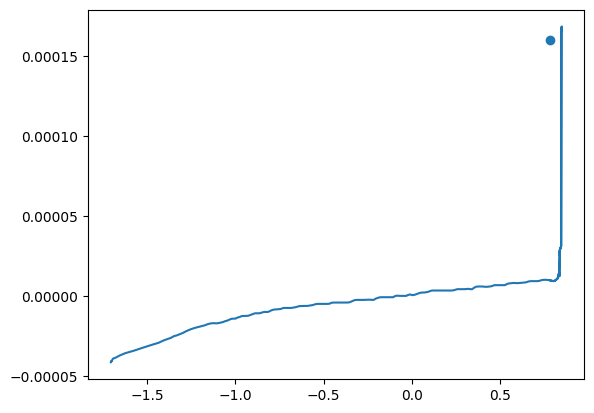

In [308]:
plt.plot(V_ascend, I1)
plt.scatter(V_descend[0], I2[0])

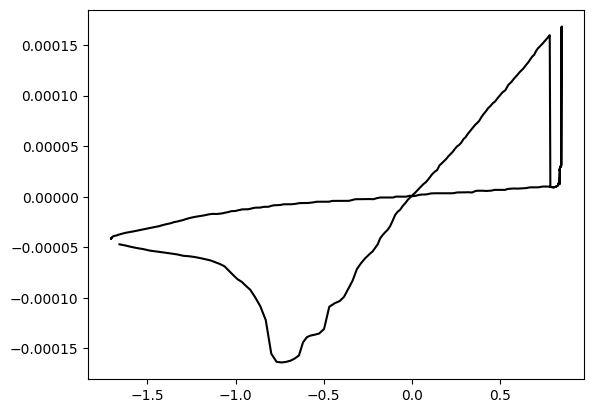

In [304]:
plt.plot(some_V, some_I, color = 'black')
# plt.plot(newV_from_t2(t_hype_period[threshold:]), I2_from_V(newV_from_t2(t_hype_period[threshold:])), color = 'orange')

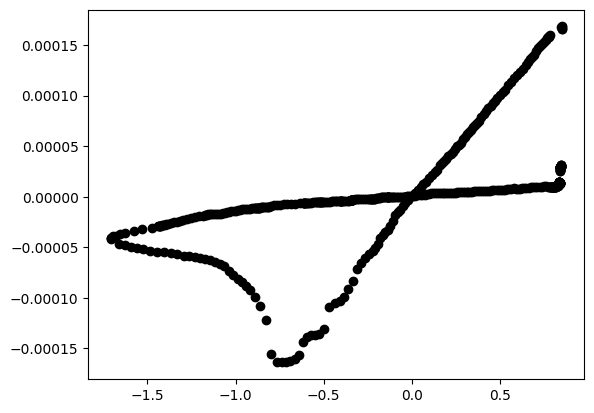

In [297]:
plt.scatter(some_V, some_I, color = 'black')


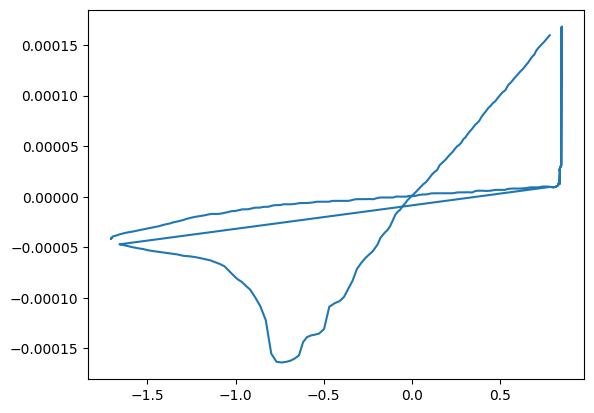

In [317]:
V_ascend = (newV_from_t2(t_hype_period[:threshold]))
V_descend = sorted((newV_from_t2(t_hype_period[threshold:])))
I1 = I1_from_V(V_ascend)
I2 = I2_from_V(V_descend)
some_V = np.concatenate((V_ascend, V_descend))
some_I = np.concatenate((I1, I2))
I_V_timed = pd.DataFrame(t_hype_period.reshape(-1, 1), columns = ['time'])
I_V_timed['I'] = some_I
I_V_timed['V'] = some_V
plt.plot(some_V, some_I)

In [336]:
sum(t_hype_period == sorted(t_hype_period))/len(t_hype_period)

1.0

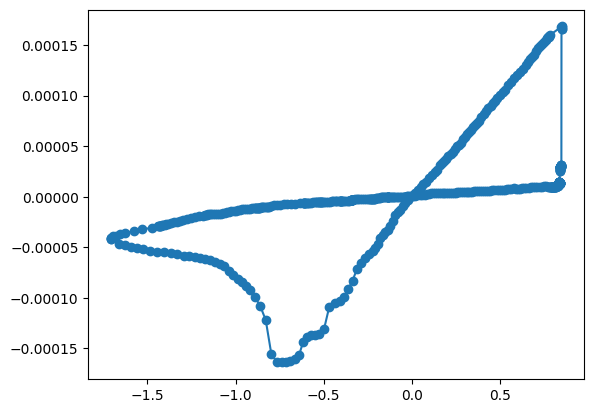

In [337]:
V_ascend = sorted(newV_from_t2(t_hype_period[:threshold]))
V_descend = (newV_from_t2(t_hype_period[threshold:]))
I1 = I1_from_V(V_ascend)
I2 = I2_from_V(V_descend)
some_V = np.concatenate((V_ascend, V_descend))
some_I = np.concatenate((I1, I2))

I_V_timed = pd.DataFrame(t_hype_period.reshape(-1, 1), columns = ['time'])
I_V_timed['I'] = some_I
I_V_timed['V'] = some_V
plt.plot(np.append(some_V, some_V[0]) , np.append(some_I, some_I[0]))
plt.scatter(np.append(some_V, some_V[0]) , np.append(some_I, some_I[0]) )

In [338]:
I_V_timed.to_csv(data_path/'I_V_timed.csv')

In [340]:
I_V_timed[['I', 'V']]

,I,V
0,-0.000042,-1.706580
1,-0.000041,-1.704332
2,-0.000041,-1.703274
3,-0.000039,-1.693571
4,-0.000039,-1.678429
...,...,...
495,-0.000052,-1.523214
496,-0.000051,-1.558389
497,-0.000050,-1.592973
498,-0.000048,-1.626687


In [345]:
iv_arr = I_V_timed[['V', 'I']].values
window_size = 32

In [354]:
windowed_arr = []
for ind_start in range(len(iv_arr)):
    ind_end = ind_start + window_size
     
    if ind_end > len(iv_arr):
        cycle_slice = iv_arr[ind_start : ind_end]
        cycle_slice = np.append(cycle_slice, iv_arr[0:ind_end -len(iv_arr)], axis=0)
    else:
        cycle_slice = iv_arr[ind_start : ind_end]
    windowed_arr.append(cycle_slice)
iv_windowed = np.stack(windowed_arr, axis=0)
print(iv_windowed.shape) 
# shuffling   
# A[np.random.choice(A.shape[0], 2, replace=False), :]


(500, 32, 2)


In [357]:
target_I = iv_windowed[:,:, 1]
target_I.shape

(500, 32)

In [355]:
np.random.choice(iv_windowed, replace=True)

ValueError: a must be 1-dimensional

In [ ]:
def preproc_V_I_window_dataset(window_size):
    """
    window_size : same as timestep count
    """


In [329]:
sum(V_ascend == sorted(V_ascend)) / len(V_ascend)

0.7351351351351352

In [331]:
sum(V_descend == sorted(V_descend)) / len(V_descend)

0.0

In [298]:
np.argmax(some_I)

310

In [ ]:
plt.plot(some_V, some_I, color = 'black')

In [296]:
some_V

array([-1.70327425, -1.70657958, -1.70433172, -1.69357085, -1.67842916,
       -1.65645792, -1.62469663, -1.57741331, -1.52755841, -1.47355667,
       -1.43899926, -1.43633466, -1.43367006, -1.43100547, -1.42751636,
       -1.42262781, -1.41660047, -1.40860668, -1.40061288, -1.39261909,
       -1.38193597, -1.36644511, -1.35019429, -1.33256093, -1.31492756,
       -1.2972942 , -1.27765815, -1.25424825, -1.23030009, -1.20531949,
       -1.1849923 , -1.17375164, -1.16472946, -1.16011765, -1.15465767,
       -1.14748075, -1.1389762 , -1.12773493, -1.11649367, -1.1052524 ,
       -1.09389743, -1.08229932, -1.070617  , -1.05875121, -1.04688543,
       -1.03501964, -1.02315386, -1.01128808, -0.99942229, -0.98755651,
       -0.97569072, -0.96382494, -0.95213214, -0.94085358, -0.92958585,
       -0.91834458, -0.90738608, -0.89713153, -0.8888334 , -0.88550266,
       -0.88217191, -0.87884116, -0.87551042, -0.87217967, -0.86884892,
       -0.86551818, -0.86145122, -0.85535828, -0.84918604, -0.84

In [ ]:
for 

In [ ]:
time_range =[]

100


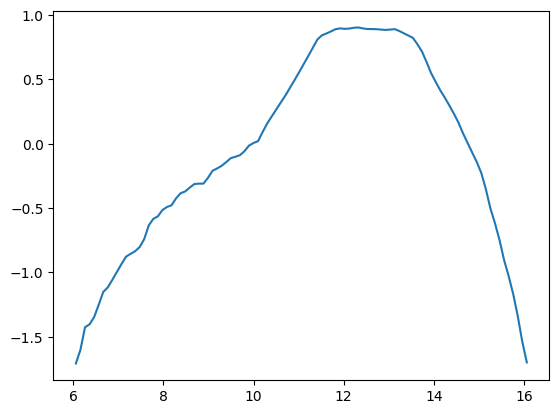

In [82]:
t_another_period = new_t[np.logical_and(new_t >= 6, new_t < 16.1)]
v_another_period = new_V[np.logical_and(new_t >= 6, new_t < 16.1)]
print(len(t_another_period))
plt.plot(t_another_period, v_another_period)

c:\Users\Peter Chizhov\.virtualenvs\neuralODE-ds-KE61R\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


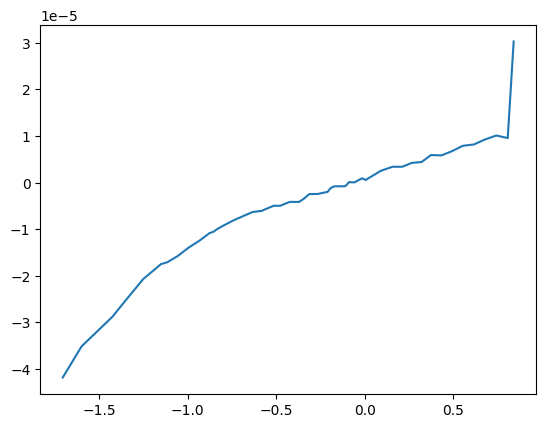

In [95]:
plt.plot(v_another_period[t_another_period < 12.5], I1_from_V(v_another_period[t_another_period < 12.5]))

c:\Users\Peter Chizhov\.virtualenvs\neuralODE-ds-KE61R\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


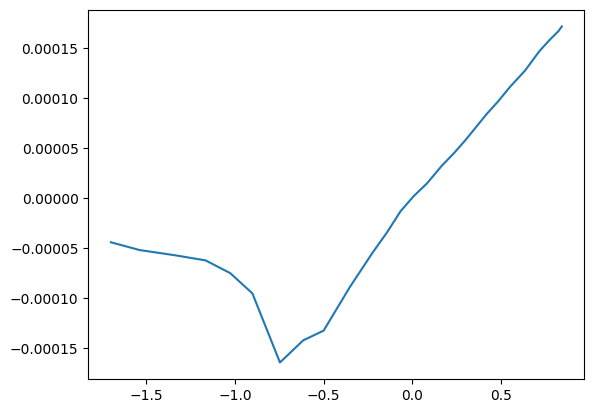

In [358]:
threshold = 12.5

c:\Users\Peter Chizhov\.virtualenvs\neuralODE-ds-KE61R\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\Peter Chizhov\.virtualenvs\neuralODE-ds-KE61R\lib\site-packages\scipy\interpolate\_interpolate.py:698: RuntimeWarning: invalid value encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


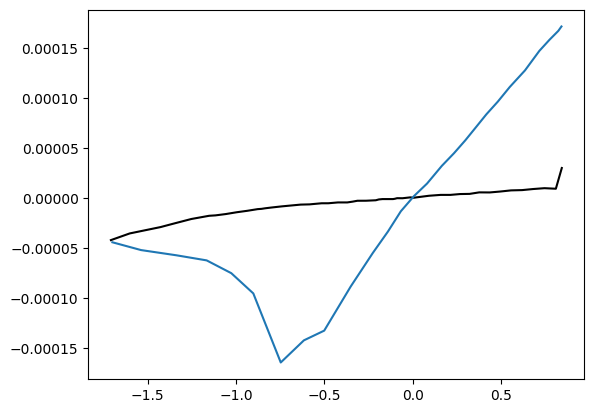

In [105]:
plt.plot(v_another_period[t_another_period < threshold], I1_from_V(v_another_period[t_another_period < threshold]), color='black')
plt.plot(v_another_period[t_another_period >= threshold], I2_from_V(v_another_period[t_another_period >= threshold]))